# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
#In Step 1, use the groupby() function to create a Series of data that has the type of city as the index,
#then apply the count() method to the "ride_id" column.
total_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
#In Step 2, use the groupby() function to create a Series of data that has the type of city as the index, 
#then apply the sum() method to the "driver_count" column.
total_driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
total_driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
#In Step 3, use the groupby() function to create a Series of data that has the type of city as the index, 
#then apply the sum() method to the "fare" column.
total_fare = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
#In Step 4, calculate the average fare per ride by city type by dividing the sum of all the fares by the total rides.
avg_fare_per_ride = total_fare / total_ride_count
avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
#In Step 5, calculate the average fare per driver by city type by dividing the sum of all the fares by the total drivers.
avg_fare_per_driver = total_fare / total_driver_count
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
#In Step 6, create a PyBer summary DataFrame with all the data gathered from Steps 1-5, using the column names shown below:.
pyber_summary_df = pd.DataFrame()
pyber_summary_df["Total Rides"] = total_ride_count
pyber_summary_df["Total Drivers"] = total_driver_count
pyber_summary_df["Total Fares"] = total_fare
pyber_summary_df["Average Fare per Ride"] = avg_fare_per_ride
pyber_summary_df["Average Fare per Driver"] = avg_fare_per_driver

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:.0f}".format)

pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:.0f}".format)

pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:.2f}".format)

pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:2f}".format)

pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:2f}".format)

pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,$4327.93,$34.623440,$55.486282
Suburban,625,490,$19356.33,$30.970128,$39.502714
Urban,1625,2405,$39854.38,$24.525772,$16.571468


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
# In Step 9, create a new DataFrame with multiple indices using the groupby() function on the "type" and "date"
#columns of the pyber_data_df DataFrame, then apply the sum() method on the "fare" column to show the total fare
#amount for each date.
total_fare_date_df = pyber_data_df.groupby(["type", "date"]).sum()["fare"]

#total_fare_date_df


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
# In Step 10, use the provided code snippet to reset the index. This is needed to use the pivot() function in Step 11.

sum_fares_by_date = pyber_data_df.groupby(["city", "type", "date"]).sum()["fare"]

#sum_fares_by_date

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

total_fare_date_df = total_fare_date_df.reset_index()
total_fare_date_df.head()

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
# In Step 11, use the pivot() function to convert the DataFrame from Step 10 so that the index is the "date," each
# column is a city "type," and the values are the "fare."

city_by_date_df = total_fare_date_df.pivot(index='date', columns='type', values='fare')
city_by_date_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
# In Step 12, create a new DataFrame by using the loc method on the following date range: 2019-01-01 through 2019-04-29.
date_time_df = city_by_date_df.loc['2019-01-01' : '2019-04-29']
date_time_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

# In Step 13, use the provided code snippet to reset the index of the DataFrame from Step 12 to a datetime data type.
#  This is necessary to use the resample() method in Step 15.
date_time_df.index = pd.to_datetime(date_time_df.index)

date_time_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
#  In Step 14, use the provided code snippet, df.info(), to check that the "date" is a datetime data type

date_time_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
# In Step 15, create a new DataFrame by applying the resample() function to the DataFrame you modified in Step 13. 
# Resample the data in weekly bins, then apply the sum() method to get the total fares for each week.
sum_ea_week_df = date_time_df.resample('W').sum()

sum_ea_week_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


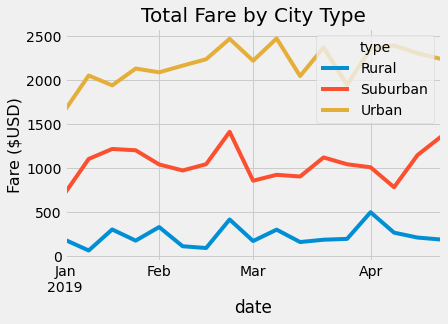

In [19]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

sum_ea_week_df.plot.line()
plt.title("Total Fare by City Type", fontsize=20)
plt.ylabel("Fare ($USD)", fontsize=16)

plt.savefig("analysis/PyBer_fare_summary.png")